In [25]:
import pygad
import numpy as np
import time
import math

In [37]:
L = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
    [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

start = (1, 1)  # start S
exit = (10, 10) # exit E
max_steps = 30

gene_space = [0, 1, 2, 3]  # 0: up, 1: right, 2: down, 3: left
num_generations = 500
num_parents_mating = 100
sol_per_pop = 500
num_genes = len(L) * len(L[0])
mutation_percent_genes = 10
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 10
fitness_threshold = 1100

def fitness_function(ga_instance, solution, solution_idx):
    fitness = 0
    position = (1, 1)  
    squares_visited = set()
    squares_visited.add(position)
    moves = {0: (0, -1), 1: (1, 0), 2: (0, 1), 3: (-1, 0)}

    for move in solution:
        next_position = (position[0] + moves[move][0], position[1] + moves[move][1])
        if next_position in squares_visited or not (
            0 <= next_position[0] < 12 and 0 <= next_position[1] < 12
        ):
            fitness -= 5  
        elif L[next_position[0]][next_position[1]] == 1:
            fitness -= 10  
        else:
            fitness += 10  
            position = next_position
            squares_visited.add(next_position)
            if position == (10, 10):
                fitness += 1000 
                break

    return fitness



fitness_function_vectorized = np.vectorize(fitness_function)


In [38]:
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type=parent_selection_type,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    keep_parents=keep_parents,
    stop_criteria=f"reach_{fitness_threshold}",
)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Best solution: {solution}")
print(f"Best solution fitness: {solution_fitness}")

# Weryfikacja ścieżki
def print_solution_path(solution):
    path = []
    x, y = start
    path.append((x, y))
    for move in solution:
        if move == 0 and x > 0 and L[x-1][y] == 0:
            x -= 1
        elif move == 1 and y < len(L[0])-1 and L[x][y+1] == 0:
            y += 1
        elif move == 2 and x < len(L)-1 and L[x+1][y] == 0:
            x += 1
        elif move == 3 and y > 0 and L[x][y-1] == 0:
            y -= 1
        path.append((x, y))
    return path

solution_path = print_solution_path(solution)
print(f"Solution path: {solution_path}")


Best solution: [2. 3. 1. 1. 2. 1. 3. 0. 2. 2. 3. 1. 2. 2. 3. 0. 2. 1. 2. 1. 1. 0. 1. 2.
 2. 3. 1. 1. 1. 3. 1. 0. 1. 3. 1. 3. 2. 1. 1. 2. 2. 2. 3. 0. 3. 3. 0. 2.
 2. 2. 2. 1. 3. 1. 1. 2. 1. 2. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 2. 0. 1. 1.
 1. 0. 1. 1. 2. 1. 2. 2. 1. 3. 0. 2. 2. 2. 0. 0. 1. 0. 0. 3. 0. 2. 2. 1.
 2. 1. 2. 0. 3. 1. 2. 0. 3. 1. 1. 1. 1. 3. 1. 3. 2. 2. 0. 3. 0. 2. 1. 2.
 2. 0. 0. 3. 0. 0. 3. 2. 2. 1. 1. 0. 2. 1. 3. 3. 2. 1. 3. 0. 0. 3. 2. 2.]
Best solution fitness: 1095
Solution path: [(1, 1), (1, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (2, 3), (1, 3), (2, 3), (3, 3), (3, 2), (3, 3), (4, 3), (4, 3), (4, 3), (3, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (3, 3), (3, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (4, 3), (3, 3), (3, 3), (3, 2), (3, 3), (3, 2), (3, 2), (3, 3), (3, 3), (4, 3), (4, 3), (4, 3), (4, 3), (3, 3), (3, 2), (3, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (7, 1), (7, 1), (7, 1), (7, 1), (8, 1), (8, 1), (9, 1), (9, 1), (9, 1), (9, 1), (8, 1)

In [39]:
import time

times = []
for _ in range(10):
    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    times.append(end_time - start_time)

average_time = np.mean(times)
print(f"Average time over 10 runs: {average_time} seconds")


Average time over 10 runs: 0.10295772552490234 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Generations completed: 30
Best solution: [2. 3. 0. 1. 2. 1. 2. 2. 0. 2. 3. 2. 3. 2. 3. 2. 1. 1. 0. 3. 1. 1. 1. 2.
 2. 1. 2. 1. 2. 1. 1. 2. 2. 3. 3. 2. 1. 3. 2. 2. 1. 1. 3. 2. 0. 3. 1. 1.
 3. 1. 3. 2. 0. 3. 2. 2. 1. 0. 3. 0. 0. 0. 1. 2. 1. 1. 2. 3. 1. 2. 1. 0.
 0. 3. 0. 2. 1. 2. 1. 3. 0. 1. 0. 1. 3. 1. 2. 0. 1. 0. 1. 0. 3. 2. 3. 0.
 0. 1. 3. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 2. 3. 2. 3. 2. 2. 1. 1. 2.
 0. 3. 3. 1. 3. 0. 3. 1. 3. 2. 1. 0. 1. 3. 2. 3. 2. 3. 1. 1. 0. 1. 1. 2.]
Fitness value of the best solution: 1095
Time taken: 0.05710554122924805 seconds


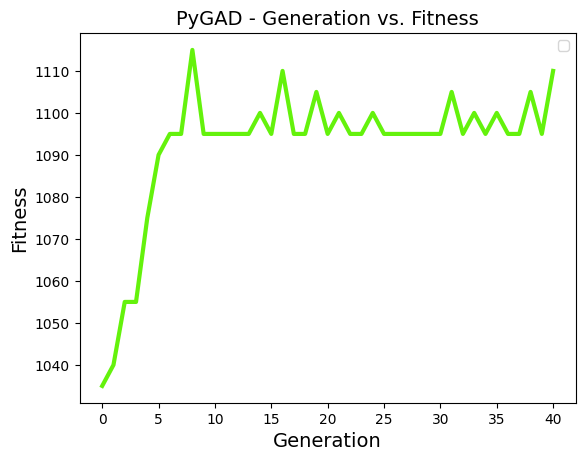

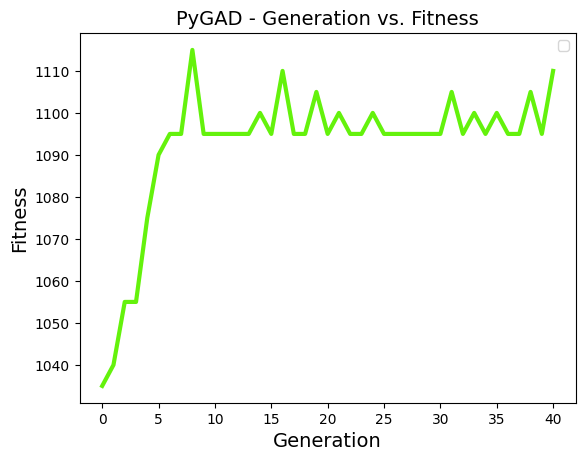

In [40]:
generations_completed = ga_instance.generations_completed
solution, solution_fitness, _ = ga_instance.best_solution()
print("Generations completed: {0}".format(generations_completed))
print(f"Best solution: {solution}")
print(f"Fitness value of the best solution: {solution_fitness}")
print(f"Time taken: {end_time - start_time} seconds")

ga_instance.plot_fitness()